In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE 

In [2]:
conn = mysql.connector.connect(user='root', password='password', host='127.0.0.1', port='3306',
                               database='expression_atlas_cells')
mycursor = conn.cursor(buffered=True)

# check the connection
if conn.is_connected():
    print("connection succesfull")
else:
    print("no connection")

connection succesfull


In [20]:
def tsne_plots(finalDF, perplexity=None):   
    c = len(np.unique(finalDF['cell_line']))
    pal = sns.color_palette("Spectral", n_colors=c)
    fig = plt.figure(figsize=(25,10))
    fig.add_subplot(1,2,1)
    g = sns.scatterplot(data=finalDF, x='TSNE_1', y='TSNE_2', hue='cell_line', palette=cell_colors[:29])
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set(title = f"cell_line plot; p = {perplexity}")
    print(g)

    c = len(np.unique(finalDF['PXD_accession']))
    pal = sns.color_palette("Spectral", n_colors=c)
    fig.add_subplot(1,2,2)
    g = sns.scatterplot(data=finalDF, x='TSNE_1', y='TSNE_2', hue='PXD_accession', palette=project_colors[:30])
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set(title = f"project_id plot; p = {perplexity}")
    print(g)

    #c = len(np.unique(finalDF['tissue_type']))
    #pal = sns.color_palette("Spectral", n_colors=c)
    #fig, ax=plt.subplots(figsize=(10,20))
    #g = sns.scatterplot(data=finalDF, x='TSNE_1', y='TSNE_2', hue='tissue_type', palette=project_colors[:c])
    #g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #g.set(title = f"tissue plot; p = {perplexity}")   
    #print(g)

### For original dataset (NSAF_atlas.ipynb)

In [4]:
atlas = pd.read_csv("tsne_atlas.csv")
project_pxd = pd.read_sql("SELECT project_id, PXD_accession from project", conn)
atlas = pd.merge(atlas, project_pxd, on = "project_id")

cells = atlas.pop('cell_line')
tissue_type = atlas.pop("tissue_type")
projects = atlas.pop('PXD_accession')
values = atlas
values.drop(["project_id"], inplace = True, axis = 1)

In [21]:
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral']
cell_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        cell_colors.append(ll)
print(f"length cell colours: {len(cell_colors)}")
print(f"Unique cells: {len(np.unique(cells))}")

import random
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral', 'BrBG', 'PuOr', 'RdGy', 'Blues', 'Oranges', 'Purples', 'Reds', 'YlOrBr']
project_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        project_colors.append(ll)
for r in random.sample(project_colors, 82):
    project_colors.append(r)

print(f"lenght project colors: {len(project_colors)}")
print(f"Unique projects: {len(np.unique(projects))}")

length cell colours: 63
Unique cells: 29
lenght project colors: 193
Unique projects: 30


PCA

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


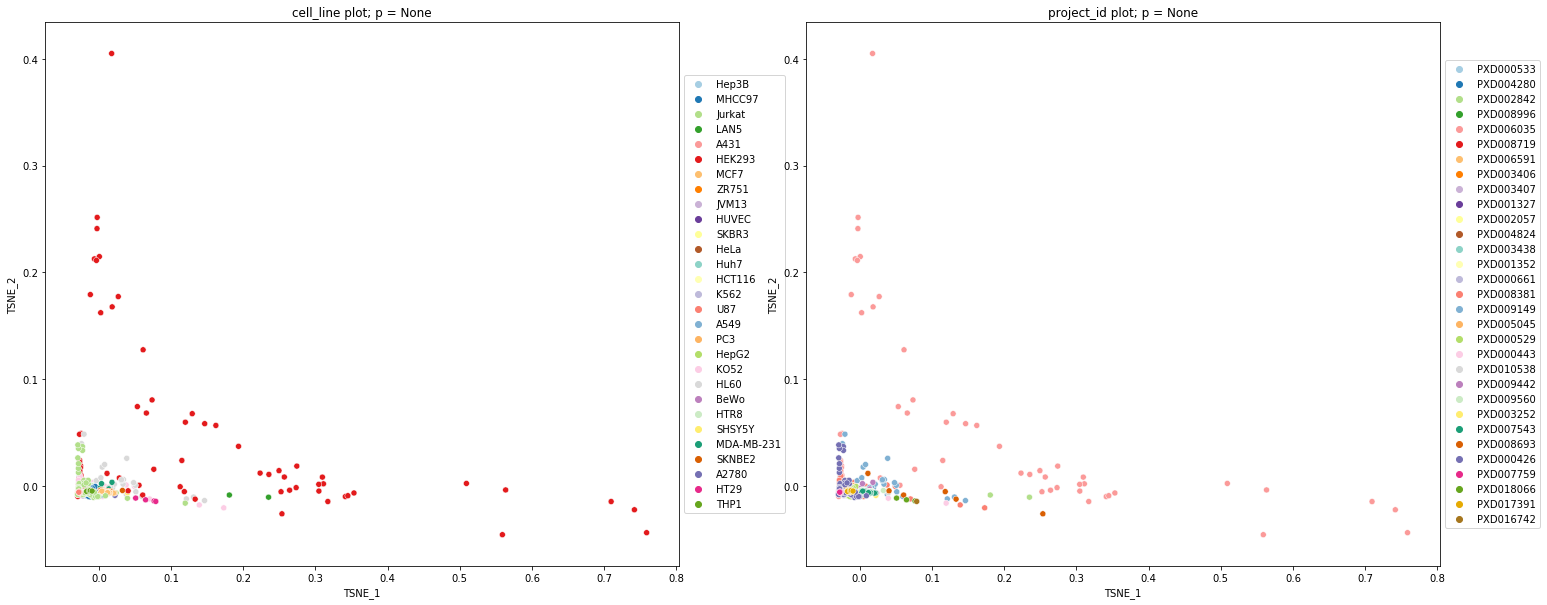

In [9]:
from sklearn.decomposition import PCA
tsne = PCA(n_components = 2)
tsne_results = tsne.fit_transform(values)
principalDf = pd.DataFrame(data = tsne_results, columns = ['TSNE_1', 'TSNE_2'])
    
finalDF = pd.concat([principalDf, cells, projects], axis = 1)
    
tsne_plots(finalDF)

t-SNE

/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


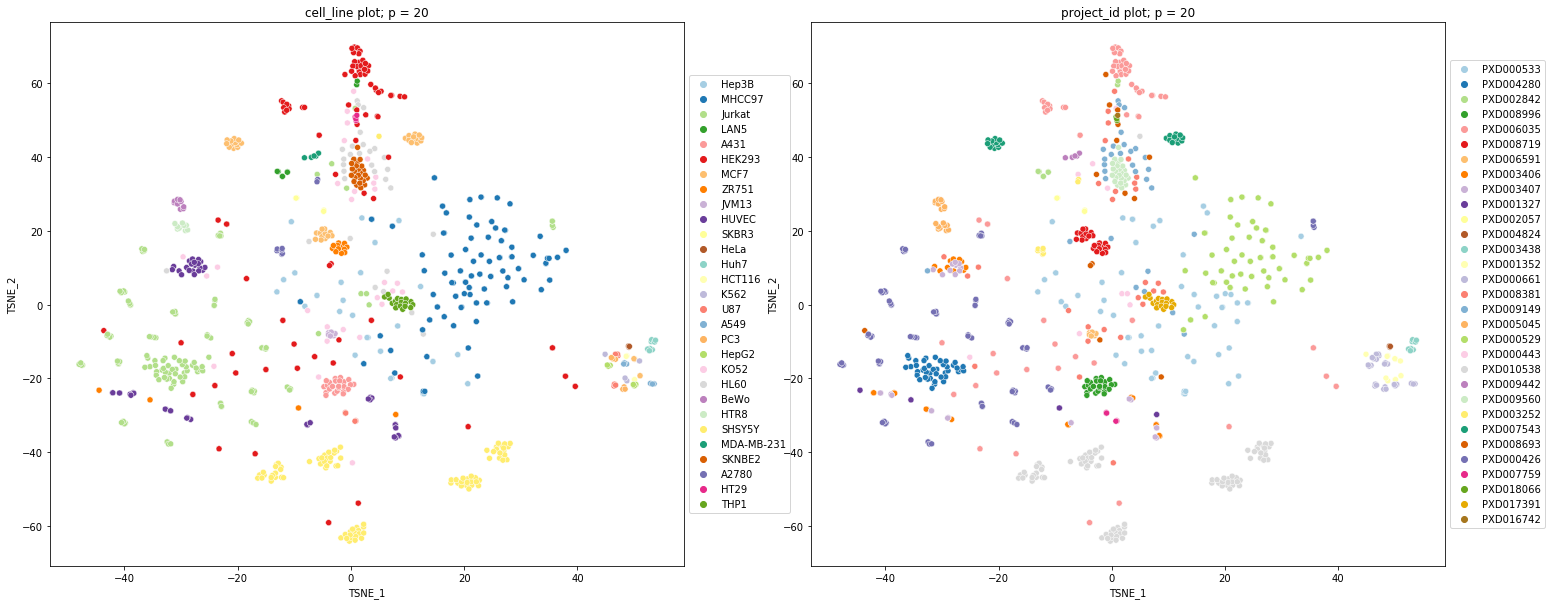

In [14]:
tsne = TSNE(n_components = 2, perplexity = 20)
tsne_results = tsne.fit_transform(values)
principalDf = pd.DataFrame(data = tsne_results, columns = ['TSNE_1', 'TSNE_2'])
    
finalDF = pd.concat([principalDf, cells, projects], axis = 1)
    
tsne_plots(finalDF, 20)

### For dataset with pooled assays (pooled_NSAF_atlas.ipynb and exploration_preprocessing.ipynb)

In [15]:
atlas = pd.read_csv("tsne_atlas2.csv")
#atlas = atlas[~atlas[""]]
cells = atlas.pop('cell_line')
#tissue_type = atlas.pop("tissue_type")
projects = atlas.pop('PXD_accession')
values = atlas
values.drop(["assay_id", "project_id"], inplace = True, axis = 1)

/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


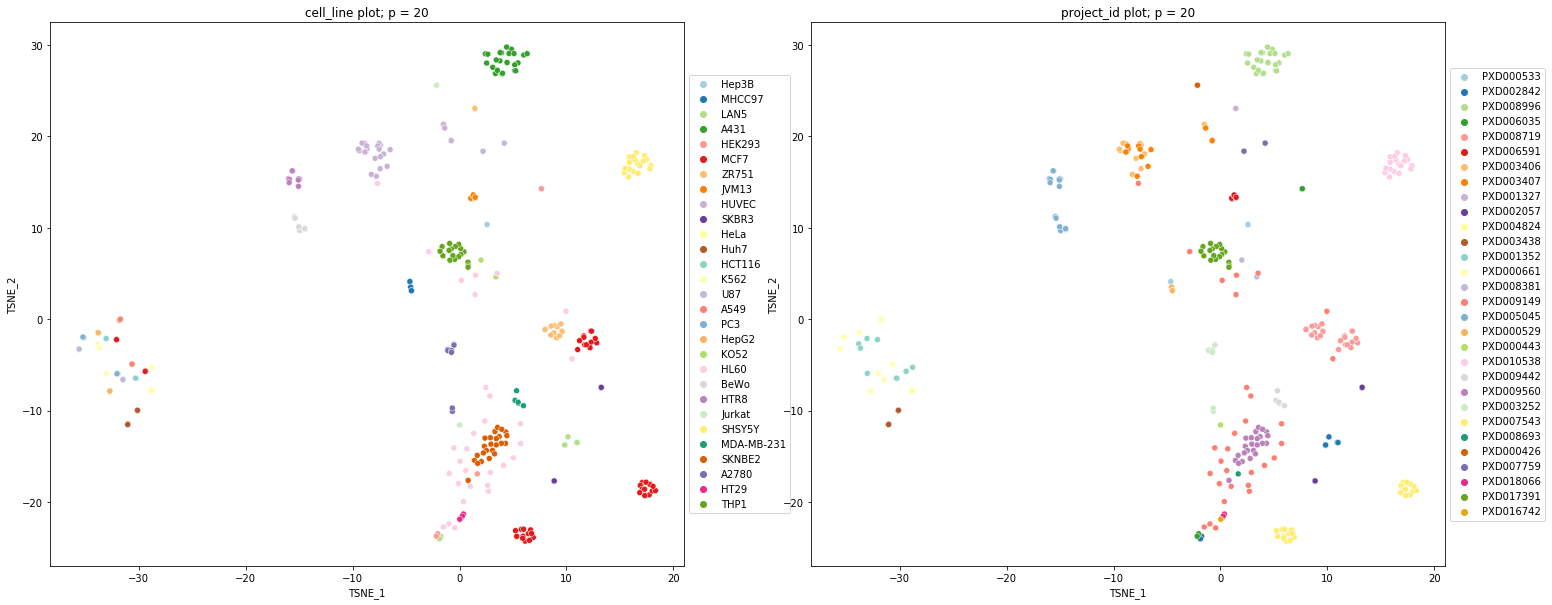

In [22]:
tsne = TSNE(n_components = 2, perplexity = 20)
tsne_results = tsne.fit_transform(values)
principalDf = pd.DataFrame(data = tsne_results, columns = ['TSNE_1', 'TSNE_2'])
    
finalDF = pd.concat([principalDf, cells, projects], axis = 1)
    
tsne_plots(finalDF, 20)

Note: 1 project (PXD004280) was emitted during pooling due to no annotation being available to pool the fractionated samples.